# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.088228184406917 Eh
E = -1.1369289594005694 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154681711140934 Eh
E = -0.9873930555210578 Eh
E = -0.9670259116093078 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283363 Eh
E = -0.9351960308386074 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411335829 Eh
E = -0.8397057843499875 Eh
E = -1.0748879317191178 Eh
E = -1.1175258568986877 Eh
E = -1.095159581564483 Eh
E = -1.0495617842752047 Eh
E = -0.9960202460350633 Eh
E = -0.941547409969219 Eh
E = -0.889975141797138 Eh
E = -0.8432718025417758 Eh
E = -0.802242958400407 Eh
E = -0.7669825247359995 Eh
E = -0.7371545448988284 Eh
E = -0.7121961606082434 Eh
E = -0.6914700512624825 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.1574841205643638 Eh
E = -0.8488985094851166 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418642 Eh
E = -1.122959387805977 Eh
E = -1.088760690592053 Eh
E = -1.0504260893271251 Eh
E = -1.015441558375804 Eh
E = -0.9873692849076269 Eh
E = -0.9670168314563373 Eh
E = -0.9534301558257325 Eh
E = -0.9449225613845069 Eh
E = -0.9398332746700122 Eh
E = -0.9368793989542719 Eh
E = -0.9351989265367069 Eh


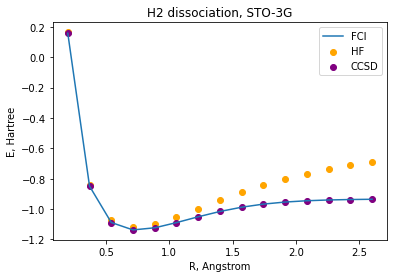

In [6]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7,15)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998408 Eh
E = -74.47523205268003 Eh
E = -74.90413378058102 Eh
E = -75.01383133956615 Eh
E = -75.00356512166857 Eh
E = -74.95170869126761 Eh
E = -74.89218648216057 Eh
E = -74.8392306366168 Eh
E = -74.79866365936432 Eh
E = -74.77161515186953 Eh
E = -74.75568947217009 Eh
E = -74.74704715251 Eh
E = -74.74248898749714 Eh
E = -74.74007426700052 Eh
Could not converge


In [9]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321603 Eh
E = -74.45343797012316 Eh
E = -74.87055361047616 Eh
E = -74.96308510924194 Eh
E = -74.92817508739313 Eh
E = -74.84281942863585 Eh
E = -74.74051950149544 Eh
E = -74.63577758415263 Eh
E = -74.5357663865706 Eh
E = -74.44494384741583 Eh
E = -74.36975504261409 Eh
E = -74.29778481417574 Eh
E = -74.2416722005157 Eh
E = -74.27129957697466 Eh
Could not converge


In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.142763639187 Eh
E = -74.47519485717143 Eh
E = -74.9040635301056 Eh
E = -75.01370018934782 Eh
E = -75.00330155818908 Eh
E = -74.95116757042638 Eh
E = -74.89128367467833 Eh
E = -74.83853401139113 Eh
E = -74.80070162375972 Eh
E = -74.78105738717268 Eh
E = -74.74394274757499 Eh
E = -74.7797280151177 Eh
E = -74.7833896345313 Eh
E = -74.64224434262994 Eh
Could not converge


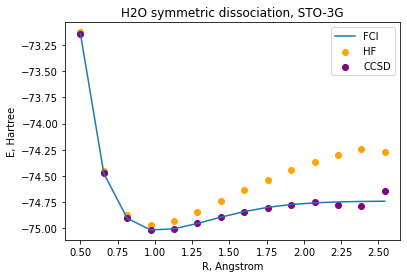

In [11]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

# LiH

In [3]:
bond_lengths = np.linspace(0.1,1.0,15)

In [4]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = 2.7629075297859043 Eh
E = -2.6842987480817744 Eh
E = -4.772784073847836 Eh
E = -5.801181271272524 Eh
E = -6.3813608212088 Eh
E = -6.746095660520908 Eh
E = -7.002481348119937 Eh
E = -7.197534488463854 Eh
E = -7.350168972226934 Eh
E = -7.4707244942140285 Eh
E = -7.566192087531446 Eh
E = -7.641703520613835 Eh
E = -7.701237719016587 Eh
E = -7.747971396411857 Eh
E = -7.784460280267046 Eh
